In [1]:
import pandas as pd
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage 
from matplotlib import pyplot as plt
from sklearn_extra.cluster import KMedoids
from sklearn.metrics import silhouette_score


In [2]:
df=pd.read_csv("CC GENERAL.csv")
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


# Data preparation


In [3]:
df.dropna(inplace=True)
df.drop(["TENURE"],axis=1,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8636 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8636 non-null   object 
 1   BALANCE                           8636 non-null   float64
 2   BALANCE_FREQUENCY                 8636 non-null   float64
 3   PURCHASES                         8636 non-null   float64
 4   ONEOFF_PURCHASES                  8636 non-null   float64
 5   INSTALLMENTS_PURCHASES            8636 non-null   float64
 6   CASH_ADVANCE                      8636 non-null   float64
 7   PURCHASES_FREQUENCY               8636 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8636 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8636 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8636 non-null   float64
 11  CASH_ADVANCE_TRX                  8636 non-null   int64  
 12  PURCHA

In [4]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT
count,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000
mean,1601.224893,0.895035,1025.433874,604.901438,420.843533,994.175523,0.496000,0.205909,0.368820,0.137604,3.313918,15.033233,4522.091030,1784.478099,864.304943,0.159304
std,2095.571300,0.207697,2167.107984,1684.307803,917.245182,2121.458303,0.401273,0.300054,0.398093,0.201791,6.912506,25.180468,3659.240379,2909.810090,2372.566350,0.296271
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.049513,0.019163,0.000000
25%,148.095189,0.909091,43.367500,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,418.559237,169.163545,0.000000
50%,916.855459,1.000000,375.405000,44.995000,94.785000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,896.675701,312.452292,0.000000
75%,2105.195853,1.000000,1145.980000,599.100000,484.147500,1132.385490,0.916667,0.333333,0.750000,0.250000,4.000000,18.000000,6500.000000,1951.142090,825.496463,0.166667
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000


In [5]:
# fig = plt.figure(figsize=(20, 10))
# for idx, col in enumerate(df.columns, 1):
#     ax = fig.add_subplot(5, 4, idx)
#     sns.boxplot(x=df[col], ax=ax)

# plt.tight_layout()

<h3>it seems that the data is full of outliers we cannot really do anything about them</h3>

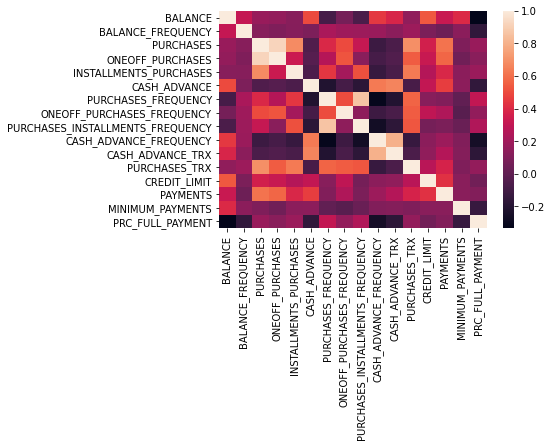

In [6]:
p1 = sns.heatmap(df.corr())

In [13]:
def convert(s):
    return int(s[1:])

In [14]:
df.CUST_ID=df.CUST_ID.apply(convert)


In [15]:
#using z-score to standerdize the data 
from sklearn.preprocessing import StandardScaler
#df_clustering= StandardScaler().fit_transform(df[['CUST_ID','BALANCE']])
df_clustering=df[['CUST_ID','BALANCE']]

# Agglomerative clustering 

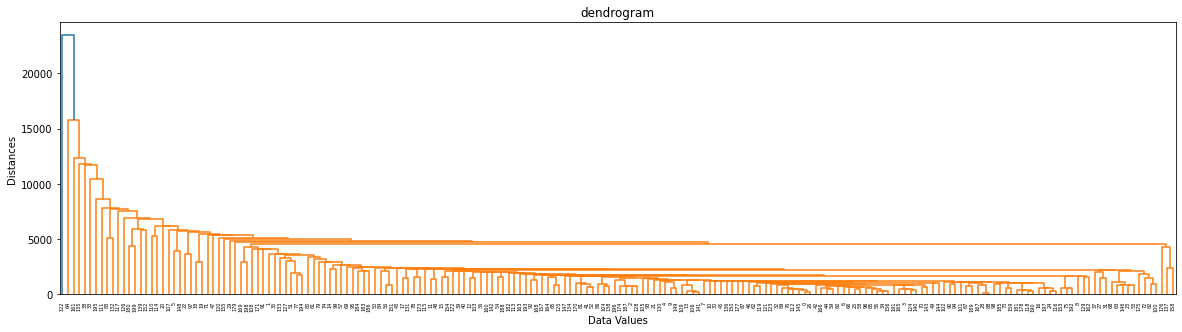

In [16]:
#using single linkage strategy, considering Euclidean distance as the complete distance measure.
import scipy.cluster.hierarchy as sch

plt.figure(figsize=(20, 5))
dendrogram = sch.dendrogram(sch.linkage(df[:200],"single"))
plt.title('dendrogram')
plt.xlabel('Data Values')
plt.ylabel('Distances')
plt.show()

In [17]:
from sklearn.cluster import AgglomerativeClustering
#2 clusters
#fit data and returns labels by fit_predict()
df_Agglomerative=df_clustering
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean',linkage='single')
cluster.fit_predict(df_Agglomerative)


array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [18]:
Agglomerative_sil_score = silhouette_score(df_Agglomerative, cluster.labels_)
Agglomerative_sil_score 

0.7634196951965869

# KMedoids

In [36]:

Kmedoids_sil_score = silhouette_score(df_KMedoids, Kmedoids_cluster.labels_)
Kmedoids_sil_score

0.2917546101472372

# Visualization

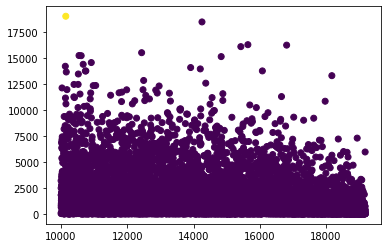

In [37]:
plt.scatter(x=df_Agglomerative.CUST_ID, y=df_Agglomerative.BALANCE, c=cluster.labels_)


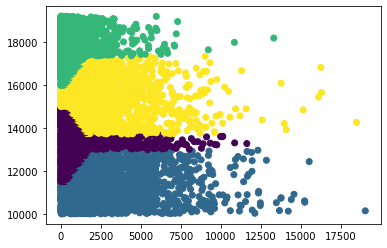

In [38]:
plt.scatter(y=df_KMedoids.CUST_ID, x=df_KMedoids.BALANCE, c=Kmedoids_cluster.labels_)


In [ ]:
km = KMeans(n_clusters=4,random_state=10)
Y_pred=km.fit_predict(df_clustering)
sns.scatterplot( data=df, x='PURCHASES', y='ONEOFF_PURCHASES',
           hue='cluster',palette="Set1")  

plt.scatter(Kmedoids_cluster.labels_[:,0], Kmedoids_cluster.labels_[:, 1], 
            s = 300, c = 'yellow')
plt.show()